In [4]:
# Carregar o dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

# Carregar dataset enviado
df = pd.read_csv('Housing.csv')

# Ver primeiras linhas
print(df.head())

# Informações gerais
print(df.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [5]:
# Identificar valores ausentes + porcentagem


# Contagem de valores nulos
missing_values = df.isnull().sum()

# Porcentagem de valores nulos
missing_percentage = (missing_values / len(df)) * 100

# Tabela organizada
missing_table = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

print(missing_table)


                  Missing Values  Percentage (%)
price                          0             0.0
area                           0             0.0
bedrooms                       0             0.0
bathrooms                      0             0.0
stories                        0             0.0
mainroad                       0             0.0
guestroom                      0             0.0
basement                       0             0.0
hotwaterheating                0             0.0
airconditioning                0             0.0
parking                        0             0.0
prefarea                       0             0.0
furnishingstatus               0             0.0


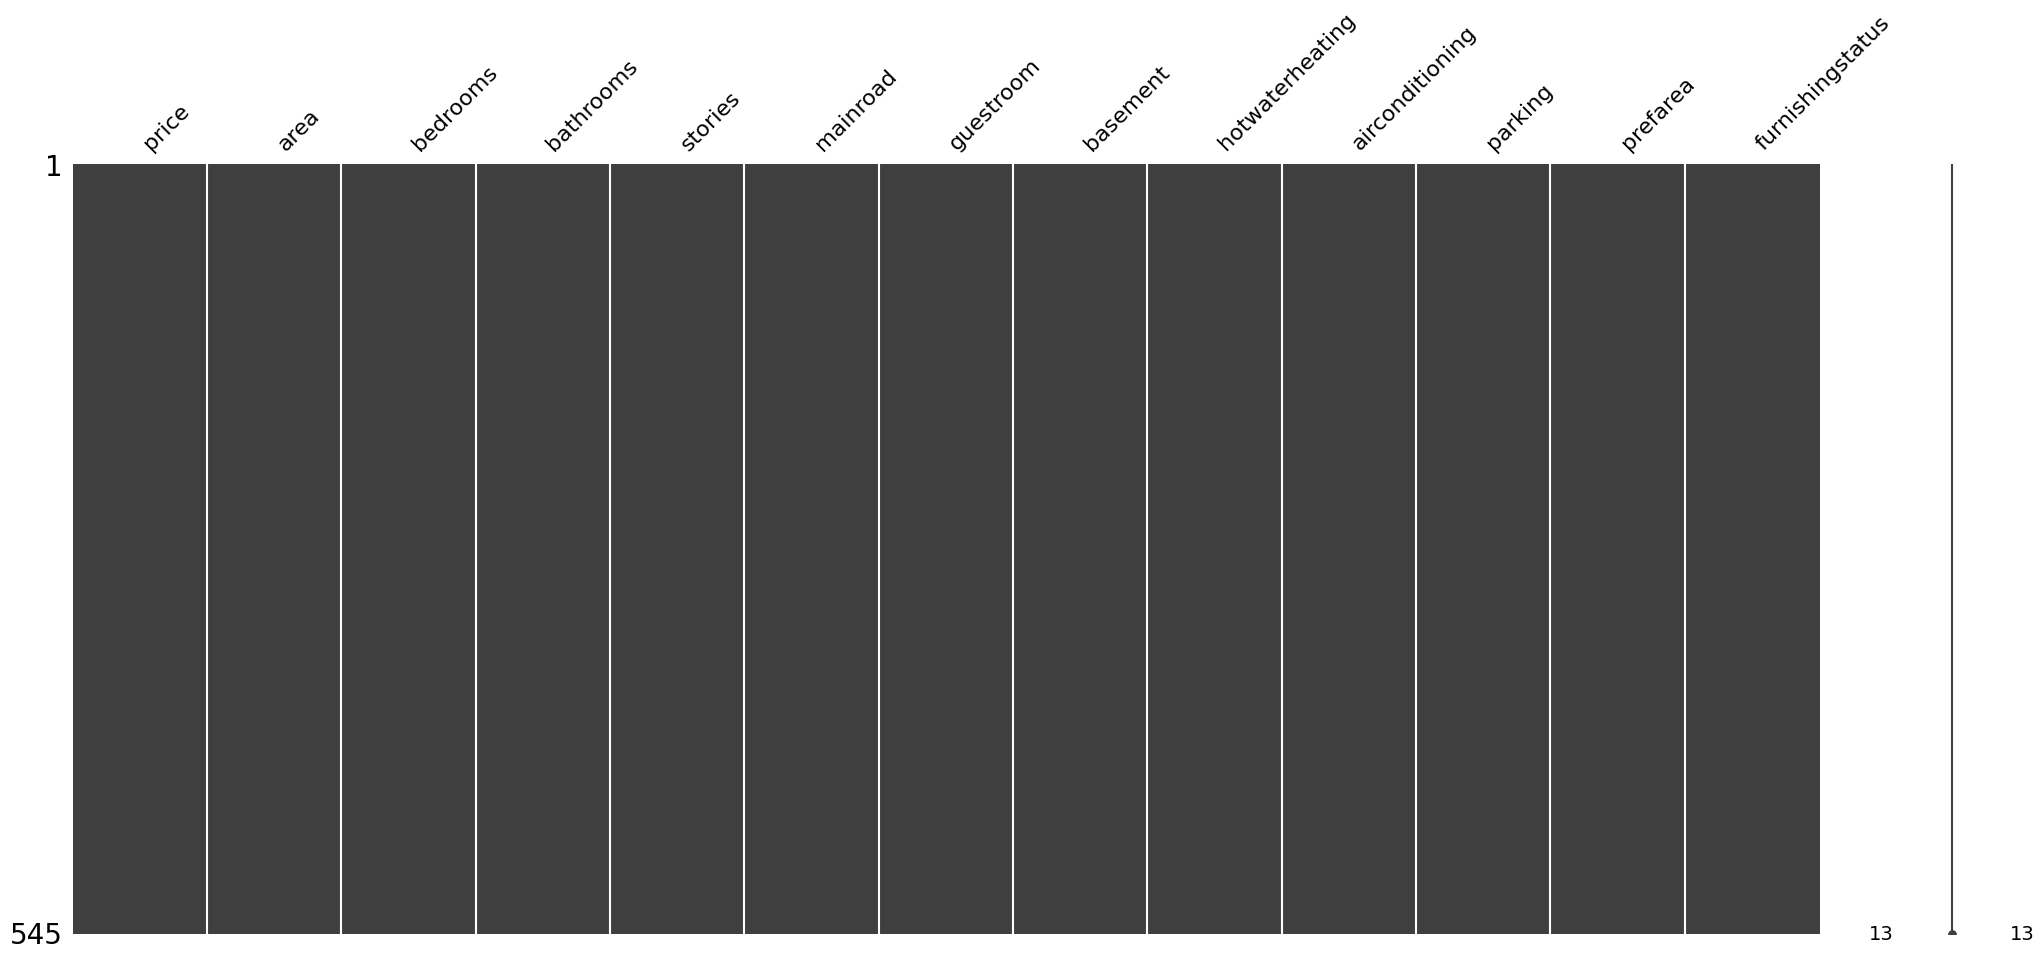

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


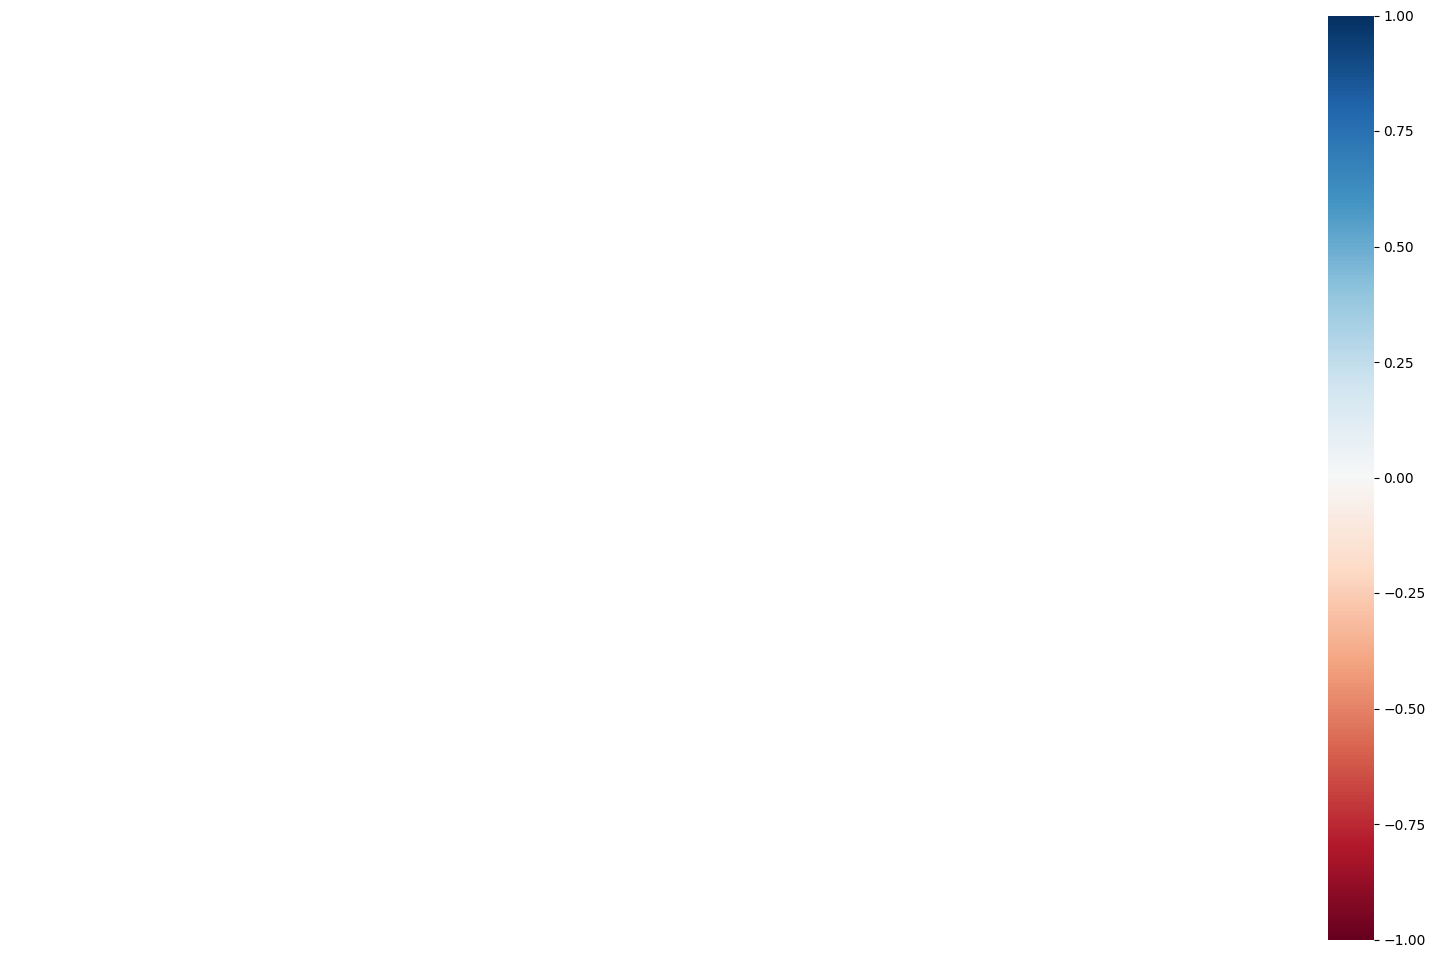

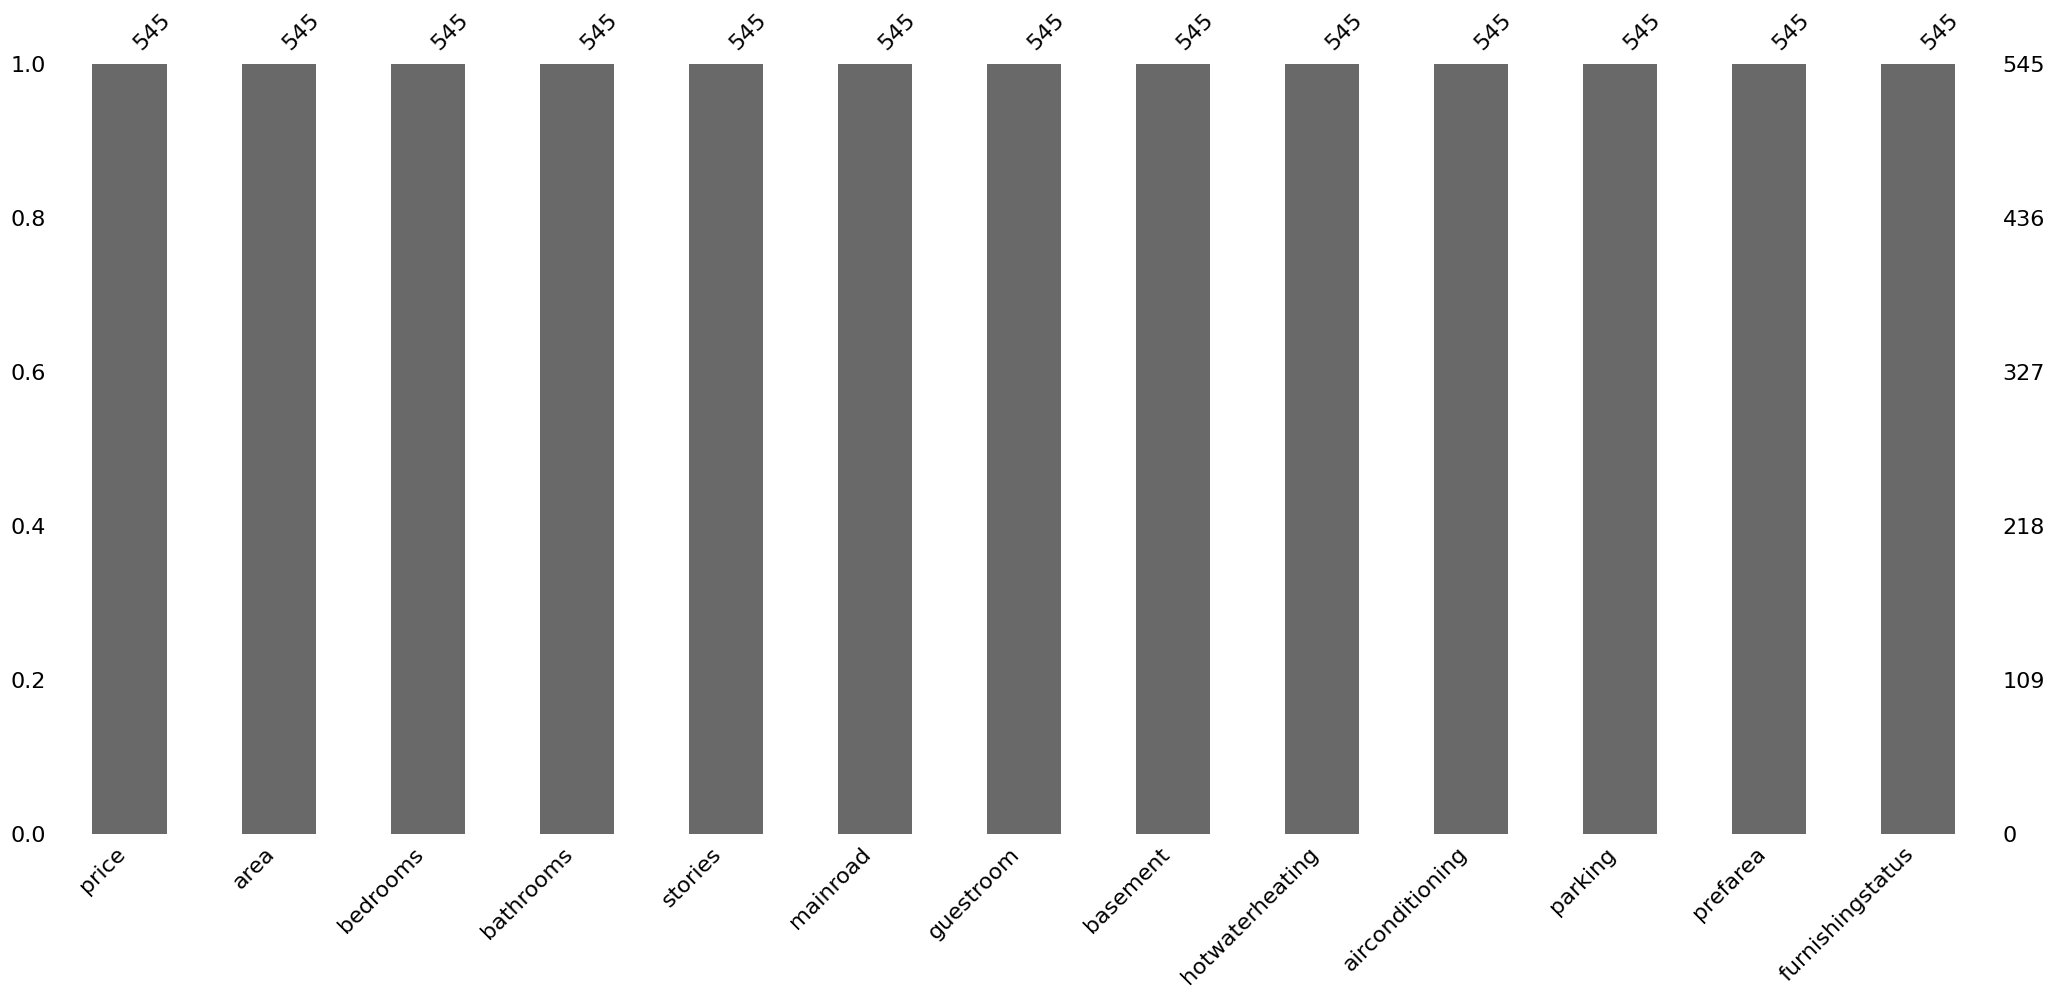

In [6]:
# Visualizar padrões de ausência (missingno)

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()

msno.bar(df)
plt.show()


In [14]:
# Três Estratégias de Tratamento de Valores Ausentes


#-----------------------------------------------------------
# Remoção de linhas com valores ausentes

df_drop = df.dropna()

print("Shape original:", df.shape)
print("Shape após remoção:", df_drop.shape)






#-----------------------------------------------------------
# Imputação com média/mediana
df_median = df.copy()

num_cols = df_median.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_median.select_dtypes(include=['object']).columns

# Numéricos = imputação com mediana
for col in num_cols:
    df_median[col] = df_median[col].fillna(df_median[col].median())

# Categóricos = imputação com moda
for col in cat_cols:
    df_median[col] = df_median[col].fillna(df_median[col].mode()[0])

print(df_median.isnull().sum())

 



#-----------------------------------------------------------
# Imputação com KNN

df_knn = df.copy()

# Selecionar apenas numéricos
num_only = df_knn.select_dtypes(include=['int64', 'float64'])

# Criar imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Aplicar imputação
num_imputed = imputer.fit_transform(num_only)

# Transformar de volta para DataFrame
df_knn[num_only.columns] = num_imputed

print(df_knn.isnull().sum())

  


Shape original: (545, 13)
Shape após remoção: (545, 13)
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Comparação das Estratégias

comparison = pd.DataFrame({
    'Original Missing': df.isnull().sum(),
    'Drop Missing': df_drop.isnull().sum(),
    'Median/Mode Missing': df_median.isnull().sum(),
    'KNN Missing': df_knn.isnull().sum()
})

print(comparison)


                  Original Missing  Drop Missing  Median/Mode Missing  \
price                            0             0                    0   
area                             0             0                    0   
bedrooms                         0             0                    0   
bathrooms                        0             0                    0   
stories                          0             0                    0   
mainroad                         0             0                    0   
guestroom                        0             0                    0   
basement                         0             0                    0   
hotwaterheating                  0             0                    0   
airconditioning                  0             0                    0   
parking                          0             0                    0   
prefarea                         0             0                    0   
furnishingstatus                 0             0   